In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-dataset/AIML Dataset.csv


In [5]:
# Load dataset
df = pd.read_csv("/kaggle/input/fraud-detection-dataset/AIML Dataset.csv")  # Replace with actual file name

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.shape

(6362620, 11)

In [13]:
# Fraud percentage
fraud_pct = round((df["isFraud"].sum() / df.shape[0]) * 100, 2)
print(f"Fraud percentage: {fraud_pct}%")

Fraud percentage: 0.13%


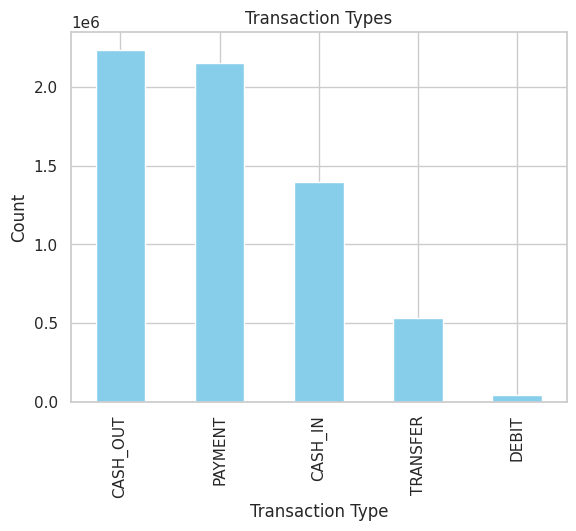

In [14]:
# Transaction types plot
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

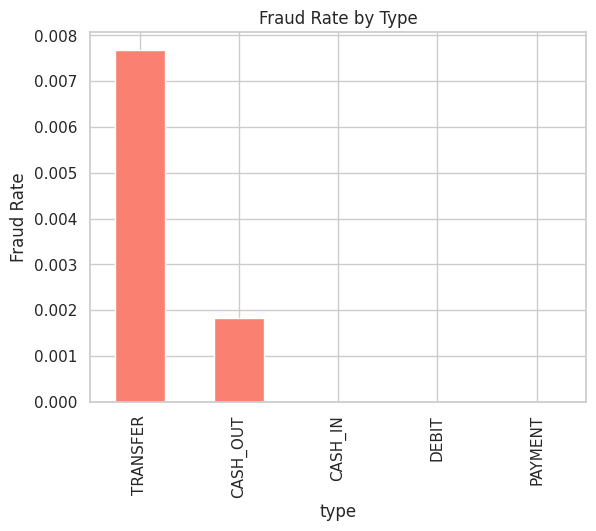

In [15]:
# Fraud rate by type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [16]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

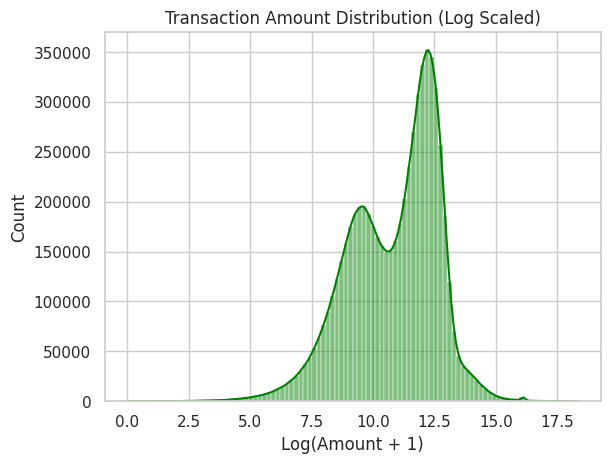

In [17]:
# Amount distribution
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (Log Scaled)")
plt.xlabel("Log(Amount + 1)")
plt.show()

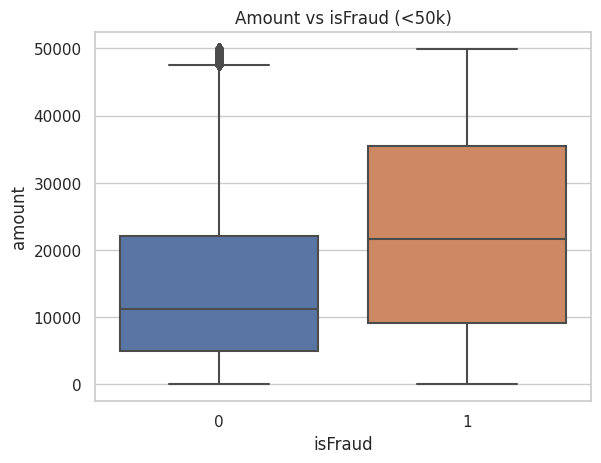

In [18]:
# Box plot: fraud vs amount
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (<50k)")
plt.show()

In [19]:
# Balance difference columns
df["bal_diff_orig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["bal_diff_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]
print("Negative origin bal diff:", (df["bal_diff_orig"] < 0).sum())
print("Negative dest bal diff:", (df["bal_diff_dest"] < 0).sum())

Negative origin bal diff: 1399253
Negative dest bal diff: 1238864


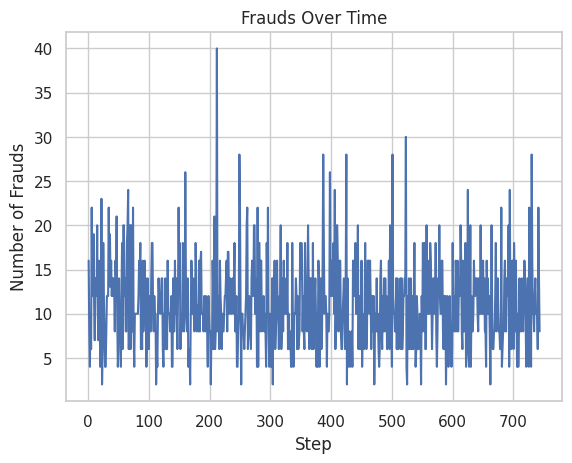

In [20]:
# Drop step after visualizing
fraud_steps = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(fraud_steps.index, fraud_steps.values)
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [21]:
df.drop(columns="step", inplace=True)

In [22]:
df["nameOrig"].value_counts().head(10)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [23]:
df["nameDest"].value_counts().head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [24]:
df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

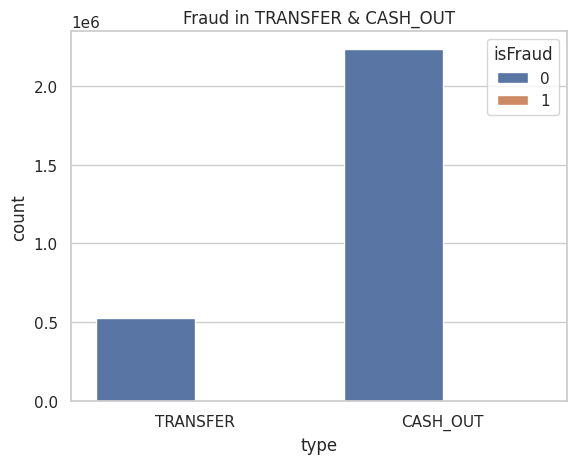

In [25]:
# Transfer & cash out fraud
filtered = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
sns.countplot(data=filtered, x="type", hue="isFraud")
plt.title("Fraud in TRANSFER & CASH_OUT")
plt.show()

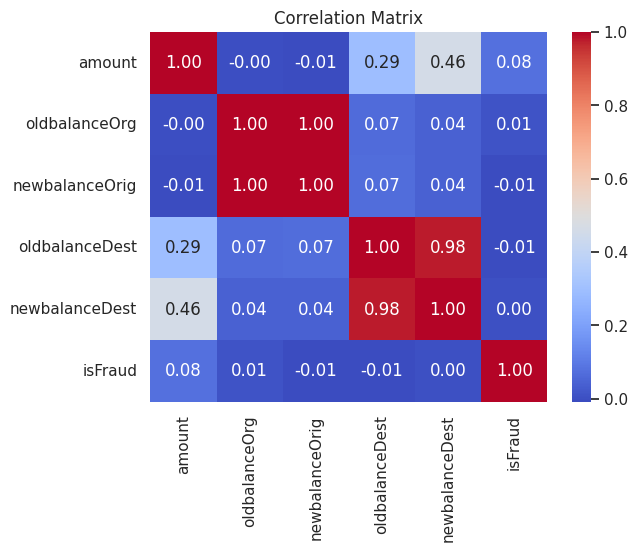

In [26]:
# Correlation matrix
corr = df[
    ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]
].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [27]:
# Suspicious 0 balance after transfers
zero_after = df[
    (df["oldbalanceOrg"] > 0)
    & (df["newbalanceOrig"] == 0)
    & (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]
print("Zero after transfer count:", len(zero_after))

Zero after transfer count: 1188074


In [28]:
# ML model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [29]:
df_model = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"])

In [30]:
categorical = ["type"]
numerical = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [31]:
X = df_model.drop("isFraud", axis=1)
y = df_model["isFraud"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [33]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

In [34]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [36]:
y_pred = pipeline.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [38]:
print(confusion_matrix(y_test, y_pred))

[[1802258  104064]
 [    159    2305]]


In [39]:
print("Accuracy:", pipeline.score(X_test, y_test))

Accuracy: 0.9453982793251836


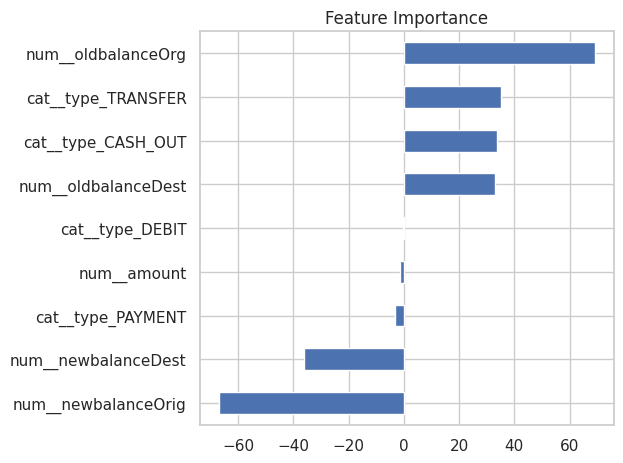

In [40]:
import matplotlib.pyplot as plt

feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = pipeline.named_steps["classifier"].coef_[0]

feat_df = pd.Series(importances, index=feature_names).sort_values()
feat_df.plot(kind="barh", title="Feature Importance")
plt.tight_layout()
plt.show()


In [41]:
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']